In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd

In [17]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [25]:
measure_first = session.query(Measurement).first()
measure_first

In [26]:
measure_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17ff4c02a30>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_data_point_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_data_point_date)

('2017-08-23',)


In [28]:
# Perform a query to retrieve the data and precipitation scores

prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2017-06-20").\
                    filter(Measurement.date).all()
last_12months_precipation = prcp_results
last_12months_precipation

[('2017-06-20', 0.02),
 ('2017-06-21', 0.0),
 ('2017-06-22', 0.0),
 ('2017-06-23', 0.0),
 ('2017-06-24', 0.06),
 ('2017-06-25', 0.0),
 ('2017-06-26', 0.0),
 ('2017-06-27', 0.0),
 ('2017-06-28', 0.0),
 ('2017-06-29', 0.0),
 ('2017-06-30', 0.08),
 ('2017-07-01', 0.02),
 ('2017-07-02', 0.02),
 ('2017-07-03', 0.04),
 ('2017-07-04', 0.04),
 ('2017-07-05', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-07', 0.0),
 ('2017-07-08', 0.0),
 ('2017-07-09', 0.0),
 ('2017-07-10', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-12', 0.0),
 ('2017-07-13', 0.07),
 ('2017-07-14', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-16', 0.02),
 ('2017-07-17', 0.03),
 ('2017-07-18', 0.05),
 ('2017-07-20', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-23', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-25', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-31', 0.0),
 ('2017-08-01', 0.02),
 ('2017-08-02', 0.0),
 ('2017-08-03', 0.0),
 ('2017-08-04', 

In [29]:
# Save the query results as a Pandas DataFrame

prcp_df = pd.DataFrame(prcp_results)
prcp_df.head()

,date,prcp
0,2017-06-20,0.02
1,2017-06-21,0.00
2,2017-06-22,0.00
3,2017-06-23,0.00
4,2017-06-24,0.06


In [30]:
# Set the index to the date column
# Sort the dataframe by date

precip_last_12mon_df = prcp_df.set_index("date")
precip_last_12mon_df.head()

,prcp
date,
2017-06-20,0.02
2017-06-21,0.00
2017-06-22,0.00
2017-06-23,0.00
2017-06-24,0.06


<Figure size 1800x360 with 0 Axes>

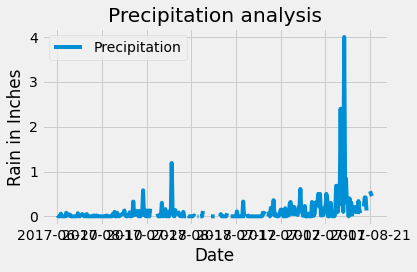

In [31]:
#Plot the precipitation over the last 12 months.

plt.figure(figsize=(25,5))
precip_last_12mon_df.plot()
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation analysis")
plt.legend(["Precipitation"])
plt.tight_layout()

# Save an image of the chart and print to screen
plt.savefig("Images/precipitation.png")
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_stats = precip_last_12mon_df.describe()
precip_stats

,prcp
count,318.000000
mean,0.104214
std,0.300195
min,0.000000
25%,0.000000
50%,0.020000
75%,0.097500
max,4.000000


In [33]:
# Design a query to show how many stations are available in this dataset?
station_first = session.query(Station).first()
station_first

In [34]:
#Show the first row of the station table.

station_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17ff5344160>,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'id': 1}

In [35]:
# Calculate the total number of stations.

total_stations = session.query(func.count(Station.station))
total_stations = total_stations[0]
total_stations

(9)

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [37]:
# Which station has the highest number of observations?

most_active_station = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
most_active_station

'USC00519281'

In [38]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23", Measurement.station == most_active_station).all()
       
tobs

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [39]:
#  Filter by the station with the highest number of observations.
most_active_stations_tobs_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                                        filter(Measurement.date >= "2016-08-23").\
                                        filter(Measurement.station == most_active_station).all()
most_active_stations_tobs_results

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_query = session.query(Station.id, Station.name, func.min(Measurement.tobs), func.max(Measurement.tobs),\
                  func.avg(Measurement.tobs)).filter(Measurement.station == Station.station).\
                  filter(Measurement.station == "USC00519281")
    
print(f"Min. temp: {temp_query[0][2]}, Max. temp: {temp_query[0][3]}, Avg temp: {temp_query[0][4]}")

Min. temp: 54.0, Max. temp: 85.0, Avg temp: 71.66378066378067


In [41]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_highest_temp = session.query(Measurement.tobs).filter(Measurement.date > "2016-08-23").\
                        filter(Measurement.station == most_active_station).order_by(Measurement.tobs).all()

for row in tobs_highest_temp:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


In [42]:
tobs_df = pd.DataFrame(tobs_highest_temp, columns=['temp'])
tobs_df.head()

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


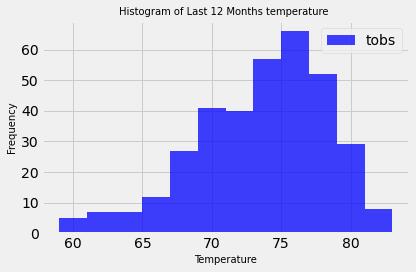

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.hist(tobs_df["temp"], bins=12,color="blue", alpha=0.75)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.title("Histogram of Last 12 Months temperature ", fontsize=10)
plt.legend(["tobs"])
plt.tight_layout()
plt.savefig("Images/temperature_results_histogram.png")
plt.show()

In [44]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# start_trip = "2018-3-10"
# end_trip = "2018-3-25"

start_trip = dt.date(2018,3,10)
end_trip = dt.date(2018,3,25)
last_year = dt.timedelta(days=365)
temp_avg_last_year = (calc_temps((start_trip-last_year), (end_trip-last_year)))

print(temp_avg_last_year)

[(65.0, 72.35416666666667, 82.0)]


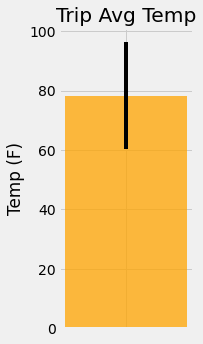

In [48]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date,\
         Measurement.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    tmax_temp = trip_dates_df["tobs"].max()
    tmin_temp = trip_dates_df["tobs"].min()
    tmean_temp = trip_dates_df["tobs"].mean()

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
    plt.figure(figsize=(3,5))
    plt.bar(1, tmean_temp, yerr= tmax_temp - tmin_temp, tick_label="", color="orange", align='center', alpha=0.75)
    plt.title("Trip Avg Temp")
    plt.ylabel("Temp (F)")
    plt.tight_layout()
    plt.savefig('Images/trip_avg_temp.png')
    plt.show()
    
calc_temps("2017-07-01", "2017-07-15")

In [49]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [50]:
# Calculate the total amount of rainfall per weather 
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_per_station = session.query(Measurement.station,func.sum(Measurement.prcp)).filter(Measurement.date.between('2016-07-01','2016-07-15')).group_by(Measurement.station).all()
rainfall_per_station

[('USC00513117', 1.78),
 ('USC00514830', 1.45),
 ('USC00516128', 7.569999999999999),
 ('USC00517948', None),
 ('USC00519281', 3.3000000000000003),
 ('USC00519397', 0.5700000000000001),
 ('USC00519523', 1.31)]

In [51]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = "2017-03-15"
end_date = "2017-03-25"

sel  = [Station.station,
        Station.name,
        Station.latitude,
        Station.longitude,
        Station.elevation,
       func.sum(Measurement.prcp)]
station_rain = (session.query(*sel).filter(Measurement.station == Station.station).\
                filter(Measurement.date.between(start_date, end_date))
               .group_by(Station.station)\
                .order_by(func.sum(Measurement.prcp).desc()).all())


station_rain

[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.34),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.92),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.87),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6799999999999999),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.21),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
